In [11]:
root_path = 'E:/eegdata'
# patients|normal
typ = 'normal'
# Alpha(8-12Hz) Beta(13-30Hz)  Delta(1-3Hz) Gamma(31-49Hz) Theta(4-7Hz)
fre = 'Theta(4-7Hz)'
#5015 3102
read_file = 'Delta_5015close-1_pruned_ICA.set'
read_path = f'{root_path}/{typ}/{fre}/{read_file}'
import mne
import matplotlib.pyplot as plt
raw = mne.io.read_raw_eeglab(read_file,
                       preload=True,
                       )

raww = raw.copy().resample(sfreq=500)
t_idx = raww.time_as_index([5., 20.])
data, times = raww[:, t_idx[0]:t_idx[1]]

data1 = data.transpose()
data1 = data1.reshape((1,7500,59)) 
from gtda.time_series import PearsonDissimilarity
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Amplitude
import time
start = time.time()
PD = PearsonDissimilarity()
X_pd = PD.fit_transform(data1)

Reading C:\Users\29183\eeg_paper\Delta_5015close-1_pruned_ICA.fdt
Reading 0 ... 119678  =      0.000 ...   239.356 secs...


C:\Users\29183\AppData\Local\Temp/ipykernel_18840/2531969627.py:11: RuntimeWarning:

The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.



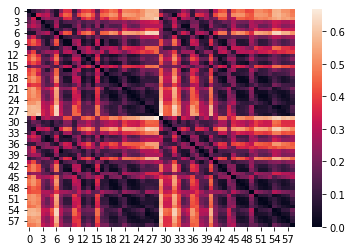

In [12]:
import seaborn
file_name = '图8病人'
file_path = 'D:/grade/eeg_hom/paper_images'
fig_path = f'{file_path}/{file_name}'
X_pl = X_pd.reshape(59,59)
fig = seaborn.heatmap(X_pl)
heatmap_fig = fig.get_figure()
heatmap_fig.savefig(fig_path, dpi = 400)

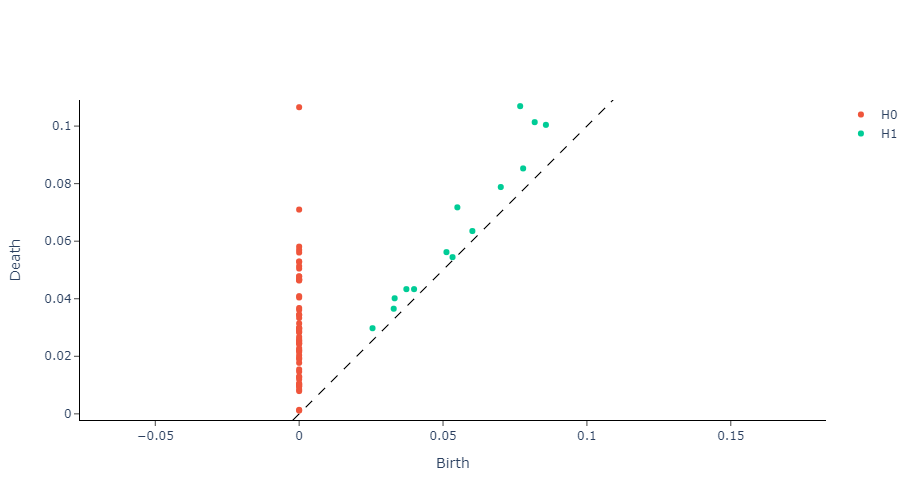

In [13]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(metric="precomputed",homology_dimensions=[0, 1, 2])
X_vr = VR.fit_transform_plot(X_pd)  # "precomputed" required on dissimilarity data

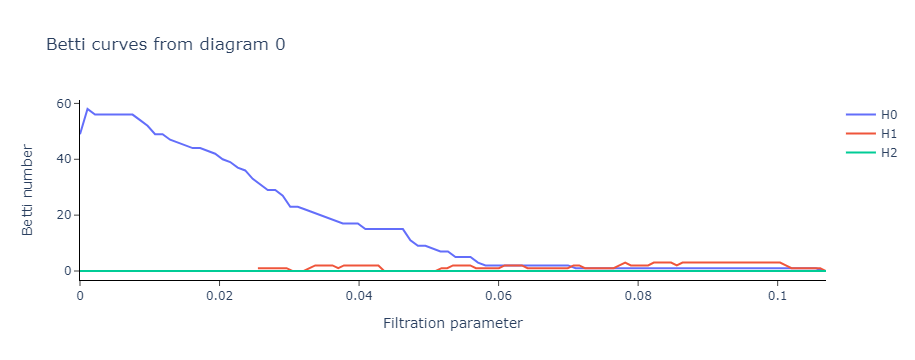

In [14]:
from gtda.diagrams import BettiCurve
BC = BettiCurve(n_bins=100,n_jobs=-1)
X_bc = BC.fit_transform_plot(X_vr)

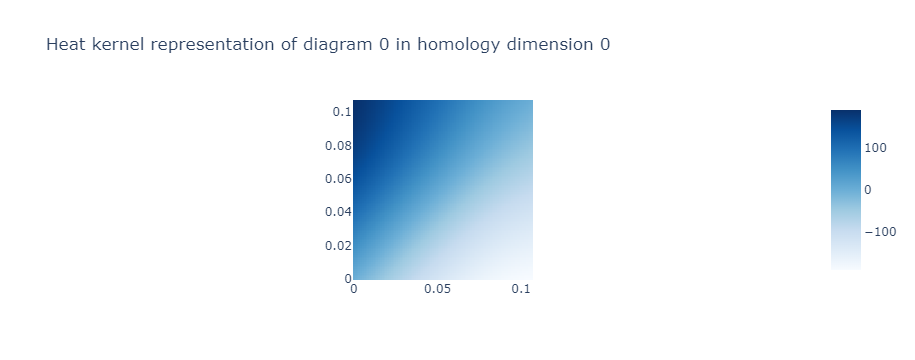

In [15]:
from gtda.diagrams import HeatKernel
HK = HeatKernel(sigma=0.1, n_bins=100, n_jobs=-1)
X_hk = HK.fit_transform_plot(X_vr)

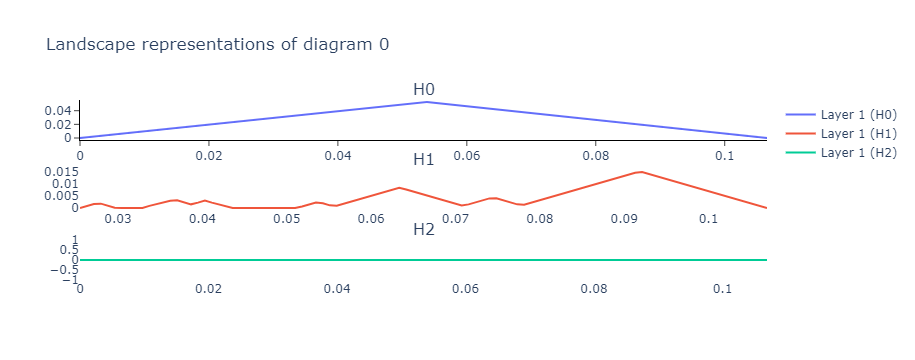

In [16]:
from gtda.diagrams import PersistenceLandscape
PL = PersistenceLandscape(n_layers=1, n_bins=100, n_jobs=-1)

X_pl = PL.fit_transform_plot(X_vr)